# **Soal Praktikum Convolutional Neural Network**

## Kegiatan 1 **(Individu)** 
70 poin

Pada tugas praktikum modul 2 CNN kali ini anda diminta untuk membuat model dengan kombinasi layer Convolutional, Pooling, dan Fully Connected Layer

Praktikum kali ini anda diminta menggunakan dataset breast cancer yang bisa diunduh menggunakan kaggle API dari: https://www.kaggle.com/forderation/breakhis-400x


Dataset tersebut merupakan gambar mikroskopis dengan zoom sebesar 400x pada pasien yang mengalami kanker payudara (Breast Cancer), dimana pada dataset tesebut dibagi menjadi dua kelas yaitu Tumor ganas (Malignant) dan Tumor jinak (Benign). Dataset sudah dibagi menjadi folder training dan testing yang berbeda dengan struktur sebagai berikut:
- BreaKHis 400X/train/benign/*kumpulan gambar
- BreaKHis 400X/train/malignant/*kumpulan gambar
- BreaKHis 400X/test/benign/*kumpulan gambar
- BreaKHis 400X/test/malignant/*kumpulan gambar

Anda diminta membuat 2 scenario modelling dengan kriteria sebagai berikut:
- 1. membuat model training dengan CNN, diantara layer convolution buatlah pooling menggunakan metode **maxpooling** kemudian diakhir layer CNN tambahkan **globalmaxpooling** sebelum melakukan flatten (model1)
- 2. membuat model training dengan CNN, diantara layer convolution buatlah pooling menggunakan metode **averagepooling** kemudian diakhir layer CNN tambahkan **globalaveragepooling** sebelum melakukan flatten (model2)

**NOTE :** Dalam modul ini tidak diperbolehkan menggunakan teknik transferlearning dari pretrain model baik yang di bagun sendiri atau anda dapatkan dari sumber lain (tensorflow, keras, dan sebagainya)



---



### 1. Load Data

Task yang perlu dikerjakan:
1. Unduh dataset tersebut kemudian lakukan ektraksi zip
2. Menampilkan hasil jumlah pembagian
3. Menampilkan sample sebagian gambar dari kelas yang berbeda dengan ukuran 2 baris x 4 kolom



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# jika anda ingin menggunakan kaggle API untuk mengunduh dataset gunakan
# kode berikut untuk membantu anda membuat config kaggle.json
# pastikan anda mendaftar akun kaggle terlebih dahulu
# kemudian menuju halaman my account dan buat token API anda

api_token = {"username":"ISI USERNAME","key":"ISI API KEY"}
import json
import zipfile
import os
with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
from google.colab import files

#install kaggle library
!pip install -q kaggle
files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
# hasil pengerjaan keg 1.1
!kaggle datasets download -d forderation/breakhis-400x

 99% 798M/803M [00:06<00:00, 135MB/s]
100% 803M/803M [00:06<00:00, 122MB/s]


In [ ]:
import os 
import zipfile

local_zip = '/content/breakhis-400x.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
# hasil pengerjaan point 1.2
base_dir = '/tmp/BreaKHis 400X'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'test')

train_benign_dir = os.path.join(train_dir, 'benign')
train_malignant_dir = os.path.join(train_dir, 'malignant')

validation_benign_dir = os.path.join(validation_dir, 'benign')
validation_malignant_dir = os.path.join(validation_dir, 'malignant')

print('total training benign images:', len(os.listdir(train_benign_dir)))
print('total training malignant images:', len(os.listdir(train_malignant_dir)))
print('total validation benign images:', len(os.listdir(validation_benign_dir)))
print('total validation malignant images:', len(os.listdir(validation_malignant_dir)))

total training benign images: 371
total training malignant images: 777
total validation benign images: 176
total validation malignant images: 369


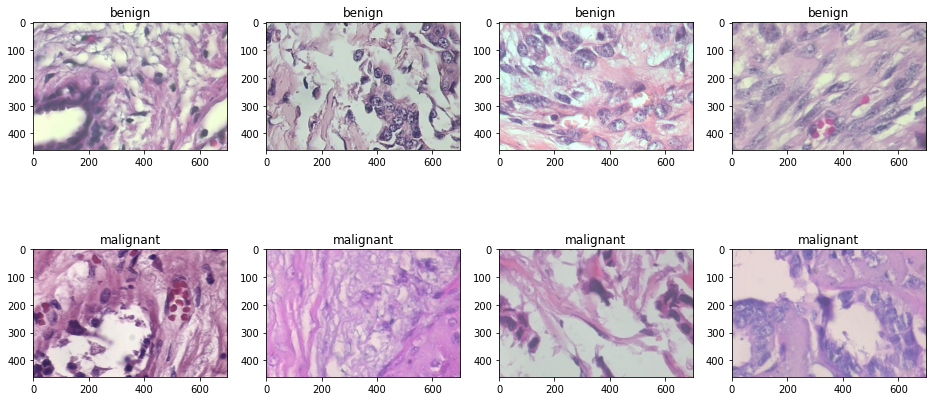

In [ ]:
# hasil pengerjaan point 1.3
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.pyplot as mping

nrows = 4
ncols = 4

pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_benign_pix = [os.path.join(train_benign_dir, fname)
                        for fname in os.listdir(train_benign_dir)[pic_index-4:pic_index]]
next_malignant_pix = [os.path.join(train_malignant_dir, fname)
                        for fname in os.listdir(train_malignant_dir)[pic_index-4:pic_index]]

for i, img_path in enumerate(next_benign_pix+next_malignant_pix):
    # set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis = ('Off') # Don't show axes (or gridlines)

    img = mping.imread(img_path)
    plt.title(img_path.split(os.path.sep)[-2])
    plt.imshow(img)
  
plt.show()

#### Contoh output kegiatan 1.3

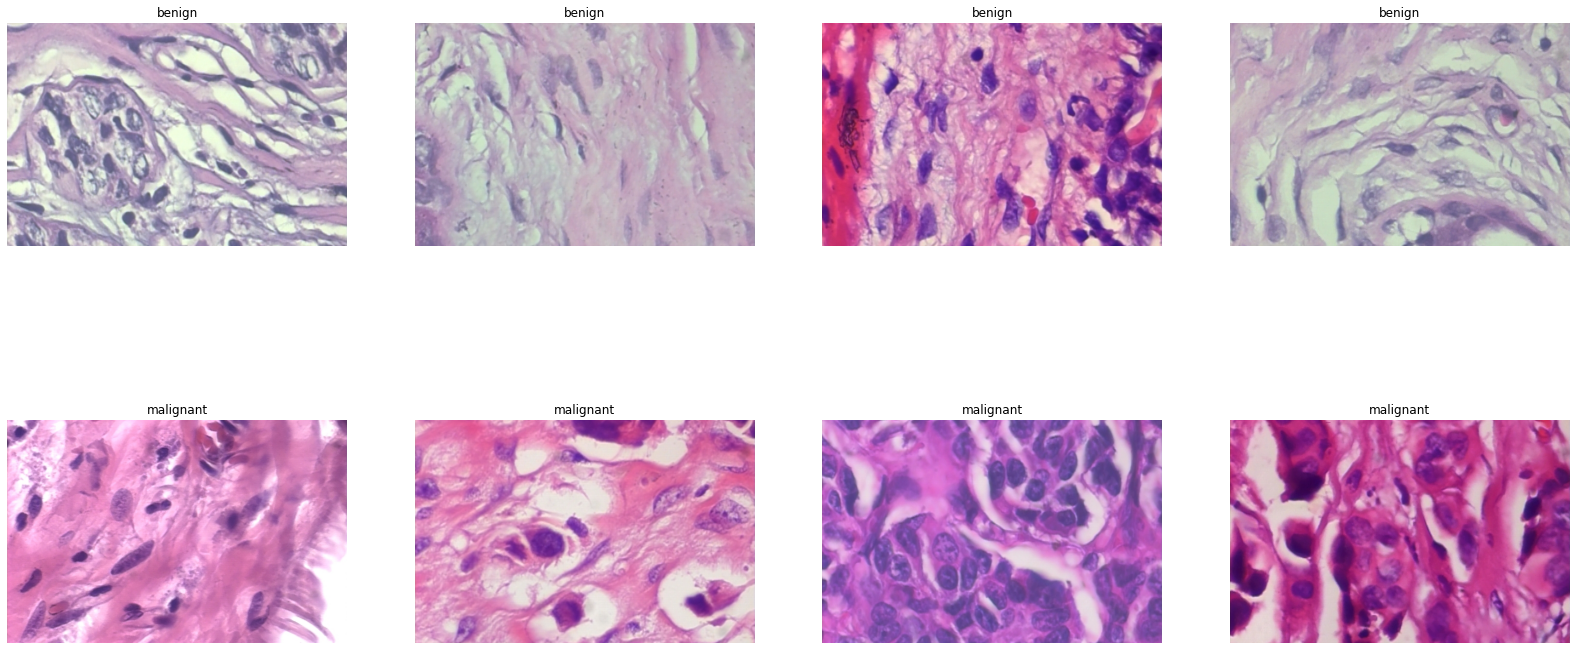

### 2. Preprocessing

Task yang perlu dikerjakan:
1. Gather data training dan testing dengan ukuran gambar **250x250**
2. Normalisasi dataset
3. Membuat label encoder


In [ ]:
# hasil pengerjaan 2.1
import cv2
import numpy as np

# gathern data train
train_data = []
train_label = []
for r, d, f in os.walk(train_dir):
    for file in f:
        if ".png" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (250,250))
            train_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            train_label.append(label)
            
train_data = np.array(train_data)
train_label = np.array(train_label)

In [ ]:
# gather data validation
val_data = []
val_label = []
for r, d, f in os.walk(validation_dir):
    for file in f:
        if ".png" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (250,250))
            val_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            val_label.append(label)

val_data = np.array(val_data)
val_label = np.array(val_label)

In [ ]:
print("Train Data = ", train_data.shape)
print("Train Label = ", train_label.shape)
print("Validation Data = ", val_data.shape)
print("Validation Label = ", val_label.shape)

Train Data =  (1148, 250, 250, 3)
Train Label =  (1148,)
Validation Data =  (545, 250, 250, 3)
Validation Label =  (545,)


In [ ]:
# hasil pengerjaan 2.2
# normalisasi dataset
print ("Data Sebelum di Normaslisasikan ", train_data[0][0][0])

x_train = train_data.astype('float32') / 255.0
x_val = val_data.astype('float32') / 255.0
print("Data Setelah Di Normalisasikan ", x_train[0][0][0])

Data Sebelum di Normaslisasikan  [192 207 200]
Data Setelah Di Normalisasikan  [0.7529412  0.8117647  0.78431374]


In [ ]:
# hasil pengerjaan pont 2.3
# Tranformasi label encoder
from sklearn.preprocessing import LabelEncoder

print("Label sebelum di-encoder ", train_label[772:782])

lb = LabelEncoder()
y_train = lb.fit_transform(train_label)
y_val = lb.fit_transform(val_label)

print("Label setelah di-encoder ", y_train[772:782])

Label sebelum di-encoder  ['malignant' 'malignant' 'malignant' 'malignant' 'malignant' 'malignant'
 'malignant' 'malignant' 'malignant' 'malignant']
Label setelah di-encoder  [1 1 1 1 1 1 1 1 1 1]


### 3. Modelling

Task yang perlu dikerjakan:
1. Membuat & menampilkan scenario Pertama
2. Membuat & menampilkan summary model scenario Kedua
3. Training model scenario Pertama
4. Training model scenario Kedua

**Note:** Minimal epoch yang didefinisikan adalah 100 epoch untuk setiap model yang dibangun

In [ ]:
# Model Scenario Pertama
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, MaxPool2D, GlobalMaxPooling2D, AveragePooling2D, GlobalAveragePooling2D, Flatten 

# Feature Extraction Layer
model = Sequential()

model.add(InputLayer(input_shape=[250,250,3]))

model.add(Conv2D(filters=16, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))

model.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))

model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))

model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(GlobalMaxPooling2D(data_format='channels_last'))

model.add(Flatten())

# Fully Connected Layer
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Print model summary
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 250, 250, 16)      448       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 125, 125, 16)      0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 125, 125, 32)      4640      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 63, 63, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 32, 32, 64)       

In [ ]:
# Model Scenario Kedua
# Feature Extraction Layer
model2 = Sequential()

model2.add(InputLayer(input_shape=[250,250,3]))

model2.add(Conv2D(filters=16, kernel_size=3, strides=1, padding='same', activation='relu'))
model2.add(AveragePooling2D(pool_size=2, padding='same'))

model2.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'))
model2.add(AveragePooling2D(pool_size=2, padding='same'))

model2.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model2.add(AveragePooling2D(pool_size=2, padding='same'))

model2.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model2.add(GlobalAveragePooling2D(data_format='channels_last'))

model2.add(Flatten())

# Fully Connected Layer
model2.add(Dense(128, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

# Print model summary
print(model2.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 250, 250, 16)      448       
_________________________________________________________________
average_pooling2d_3 (Average (None, 125, 125, 16)      0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 125, 125, 32)      4640      
_________________________________________________________________
average_pooling2d_4 (Average (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 63, 63, 64)        18496     
_________________________________________________________________
average_pooling2d_5 (Average (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 32, 32, 64)       

In [ ]:
# Training model scenario Pertama
# Compile model
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(lr=0.001), 
              loss='binary_crossentropy', 
              metrics=['acc'])

H = model.fit(x_train, y_train, batch_size=32, epochs=100, validation_data=(x_val, y_val))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
36/36 [==============================] - 5s 103ms/step - loss: 0.3449 - acc: 0.9390 - val_loss: 0.6550 - val_acc: 0.8716
Epoch 2/100
36/36 [==============================] - 3s 94ms/step - loss: 0.0023 - acc: 1.0000 - val_loss: 0.7113 - val_acc: 0.8697
Epoch 3/100
36/36 [==============================] - 3s 94ms/step - loss: 6.7966e-04 - acc: 1.0000 - val_loss: 0.7132 - val_acc: 0.8624
Epoch 4/100
36/36 [==============================] - 3s 91ms/step - loss: 5.3954e-04 - acc: 1.0000 - val_loss: 0.7145 - val_acc: 0.8661
Epoch 5/100
36/36 [==============================] - 3s 93ms/step - loss: 4.7327e-04 - acc: 1.0000 - val_loss: 0.7248 - val_acc: 0.8624
Epoch 6/100
36/36 [==============================] - 3s 92ms/step - loss: 4.1198e-04 - acc: 1.0000 - val_loss: 0.7274 - val_acc: 0.8679
Epoch 7/100
36/36 [==============================] - 3s 94ms/step - loss: 3.6458e-04 - acc: 1.0000 - val_loss: 0.7276 - val_acc: 0.8642
Epoch 8/100
36/36 [==============================] - 3s

In [ ]:
# Training model scenario Kedua
model2.compile(optimizer=Adam(lr=0.001), 
              loss='binary_crossentropy', 
              metrics=['acc'])

H2 = model2.fit(x_train, y_train, batch_size=32, epochs=100, validation_data=(x_val, y_val))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
36/36 [==============================] - 4s 100ms/step - loss: 0.2372 - acc: 0.8981 - val_loss: 0.2649 - val_acc: 0.8881
Epoch 2/100
36/36 [==============================] - 3s 89ms/step - loss: 0.2217 - acc: 0.9155 - val_loss: 0.2410 - val_acc: 0.8991
Epoch 3/100
36/36 [==============================] - 3s 91ms/step - loss: 0.2500 - acc: 0.9120 - val_loss: 0.2749 - val_acc: 0.8771
Epoch 4/100
36/36 [==============================] - 3s 89ms/step - loss: 0.2300 - acc: 0.9216 - val_loss: 0.2632 - val_acc: 0.8899
Epoch 5/100
36/36 [==============================] - 3s 90ms/step - loss: 0.2201 - acc: 0.9068 - val_loss: 0.2522 - val_acc: 0.8972
Epoch 6/100
36/36 [==============================] - 3s 90ms/step - loss: 0.2352 - acc: 0.9059 - val_loss: 0.2596 - val_acc: 0.8881
Epoch 7/100
36/36 [==============================] - 3s 89ms/step - loss: 0.2272 - acc: 0.9155 - val_loss: 0.2387 - val_acc: 0.8936
Epoch 8/100
36/36 [==============================] - 3s 88ms/step - loss: 0

### 4. Result

Task yang perlu dikerjakan:
1. Plot hasil akurasi dan loss dari kedua model menjadi 1 canvas
2. Melakukan uji coba dari salah satu gambar test pada model 1 dan model 2
3. Klasifikasi report dari kedua model
4. Jika hasil akurasi model CNN klasifikasi report kedua model diatas 90%

**Contoh output**

Tugas 4.1

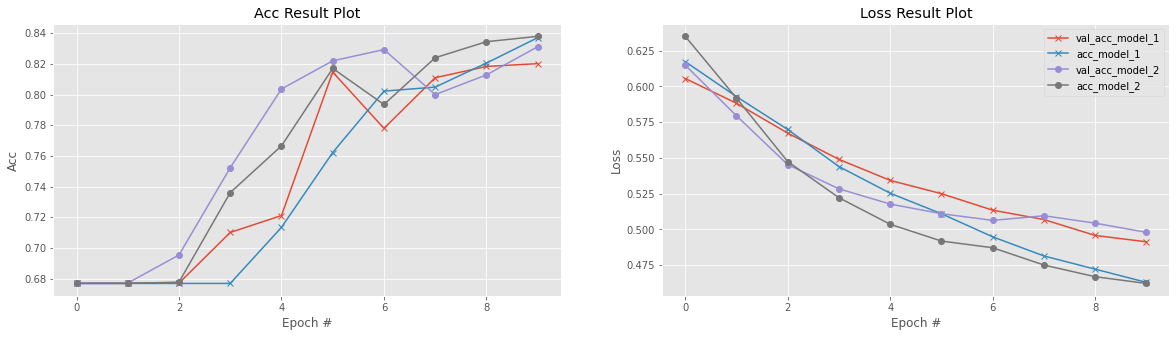

Tugas 4.2 

* Actual class ['benign']
* Hasil prediksi model 1
* Predicted class benign
* Hasil prediksi model 2
* Predicted class benign

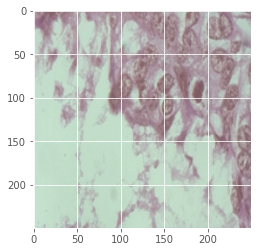

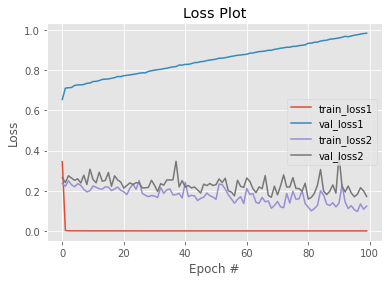

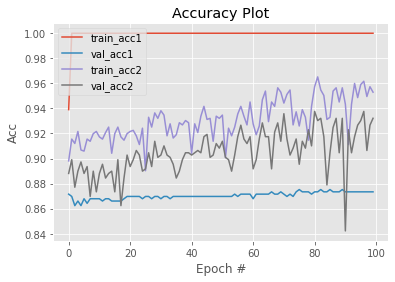

In [ ]:
# Hasil pengerjaan point 4.1
%matplotlib inline

import matplotlib.pyplot as plt

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["loss"], label="train_loss1")
plt.plot(np.arange(0, 100), H.history["val_loss"], label="val_loss1")
plt.plot(np.arange(0, 100), H2.history["loss"], label="train_loss2")
plt.plot(np.arange(0, 100), H2.history["val_loss"], label="val_loss2")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()


plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["acc"], label="train_acc1")
plt.plot(np.arange(0, 100), H.history["val_acc"], label="val_acc1")
plt.plot(np.arange(0, 100), H2.history["acc"], label="train_acc2")
plt.plot(np.arange(0, 100), H2.history["val_acc"], label="val_acc2")
plt.title("Accuracy Plot")
plt.xlabel("Epoch #")
plt.ylabel("Acc")
plt.legend()
plt.show()

Kelas Asli : malignant
Model 1 : malignant
Model 2 : benign


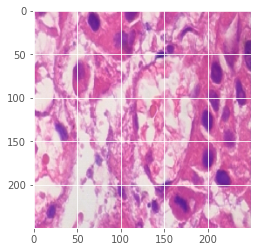

In [ ]:
# Hasil pengerjaan point 4.2
import numpy as np
from keras.preprocessing import image

test_image = image.load_img(validation_malignant_dir +'/SOB_M_DC-14-10926-400-004.png', target_size = (250, 250))
test_image = image.img_to_array(test_image)

plt.imshow(test_image/255.)

test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)

print("Kelas Asli : "+validation_malignant_dir.split(os.path.sep)[-1])

if result[0][0] >= 0.5:
        prediction = 'malignant'
else:
        prediction = 'benign'

print("Model 1 : "+prediction)


result = model2.predict(test_image)

if result[0][0] >= 0.5:
        prediction = 'malignant'
else:
        prediction = 'benign'

print("Model 2 : "+prediction)

In [ ]:
# Hasil pengerjaan point 4.3 dan 4.4
from sklearn.metrics import classification_report

pred = model.predict(x_val)
labels = (pred > 0.5).astype(np.int)

print("model 1")
print(classification_report(y_val, labels))

pred = model2.predict(x_val)
labels = (pred > 0.5).astype(np.int)

print("model 2")
print(classification_report(y_val, labels))


model 1
              precision    recall  f1-score   support

           0       0.81      0.79      0.80       176
           1       0.90      0.91      0.91       369

    accuracy                           0.87       545
   macro avg       0.86      0.85      0.85       545
weighted avg       0.87      0.87      0.87       545

model 2
              precision    recall  f1-score   support

           0       0.91      0.88      0.89       176
           1       0.94      0.96      0.95       369

    accuracy                           0.93       545
   macro avg       0.93      0.92      0.92       545
weighted avg       0.93      0.93      0.93       545



## Kegiatan 2 **(berkelompok)**
30 poin


**Ketentuan Wajib**
* Tulis dokumentasi tugas kelompok anda dalam file README.md
* Isi data tugas kelompok anda dalam google form berikut [cek disini](https://docs.google.com/forms/d/e/1FAIpQLSfXRa5gXfd4PcaxWkKifGsaliQ5koJL3xllT-oaTpPrrXU87Q/viewform?usp=sf_link)
* Cek daftar dataset seluruh praktikan [disini](https://docs.google.com/spreadsheets/d/1qyu5AVDhPhegpRTbNaDoq5qXX4_CX09Q7tYyD-fkF_c/edit?usp=sharing)
* Seluruh data harus terkumpul maksimal H-1 praktikum
* Tidak diperbolehkan berganti anggota kelompok selama satu semester ini
* Tidak diperbolehkan berganti repository selama mengerjakan tugas kelompok ini
* Pengantian dataset atau jurnal rujukan harap menginformasikan ke asisten terlebih dahulu
* Pastikan anda menggunakan akun github pribadi untuk melakukan commit dan push

**Penilaian**
* Keaktifan dalam tim
* Kontribusi dalam proyek dan tim
* Penerapan prinsip kerja Agile (sprint backlog dan report terdokumentasikan dengan baik)
* Kelengkapan dokumen proyek
* Progress pengerjaan tugas kelompok
* Pendokumentasian proyek "clear and clean documentation"

**Materi pendukung**
* [Project documentation](https://realpython.com/documenting-python-code)
* [Github readme](https://docs.github.com/en/github/writing-on-github/getting-started-with-writing-and-formatting-on-github/basic-writing-and-formatting-syntax)
* [Sprint backlog](https://www.lucidchart.com/blog/how-to-develop-a-product-backlog-in-agile)


**Tugas**

Melanjutkan tugas kelompok di modul sebelumya sekarang kerjakan beberapa poin berikut untuk didemokan kepada asisten masing-masing.

*   Melakukan proses preprocessing dataset
*   Melakukan training beberapa skema model menggunakan model CNN sederhana buatan sendiri **(minimal 2 model)** *tidak diperbolehkan menggunakan transfer learning*
* Menyimpan model yang telah di training kedalam file `.h5` [Lihat disini](https://www.tensorflow.org/tutorials/keras/save_and_load)
*  Mencatat hasil perkembangan tugas kelompok dalam file `sprint_project.xlsx` tandai masing-masing task dengan status **Done** *untuk task yang telah selesai dikerjakan*, **On Going** *untuk task yang dalam proses pengerjaan*, **Waiting** *untuk task yang belum atau akan dikerjakan*
* Pastikan anda menulis tanggal mulai dan tanggal selesai masing-masing task dengan benar
* Pastikan anda menulis penanggung jawab masing-masing task (Penanggung jawab bertugas menyelesaikan dan menuntaskan masing-masing task yang diberikan)
* `commit` dan `push` seluruh perkerjaan yang anda lakukan kedalam branch pribadi dalam repository tugas kelompok yang telah anda buat sebelumnya.
* Presentasikan kepada asisten tentang apa yang anda lakukakan selama mengerjakan tugas kelompok ini. Ceritakan tentang tugas masing-masing anggota,  kendala dalam mengerjakan tugas sampai solusi yang anda lakukan saat mengerjakan tugas kelompok ini.



In [ ]:
ls

In [ ]:
cd drive/MyDrive/DATASET/

In [ ]:
from google.colab import files

#install kaggle library
!pip install -q kaggle
files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d wanderdust/skin-lesion-analysis-toward-melanoma-detection

In [ ]:
ls

In [ ]:
import zipfile

local_zip = 'skin-lesion-analysis-toward-melanoma-detection.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()  
zip_ref.close()

In [ ]:
cd skin-lesions/

In [ ]:
ls

In [ ]:
train_dir = "train"
test_dir = "test"
valid_dir = "valid"

In [ ]:
import cv2
import numpy as np
import os

# gathern data train
train_data = []
train_label = []
for r, d, f in os.walk(train_dir):
    for file in f:
        if ".jpg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (240,240))
            train_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            train_label.append(label)
            print(imagePath)
            
train_data = np.array(train_data)
train_label = np.array(train_label)

train/melanoma/ISIC_0000002.jpg
train/melanoma/ISIC_0000004.jpg
train/melanoma/ISIC_0000013.jpg
train/melanoma/ISIC_0000022.jpg
train/melanoma/ISIC_0000026.jpg
train/melanoma/ISIC_0000029.jpg
train/melanoma/ISIC_0000030.jpg
train/melanoma/ISIC_0000031.jpg
train/melanoma/ISIC_0000035.jpg
train/melanoma/ISIC_0000036.jpg
train/melanoma/ISIC_0000040.jpg
train/melanoma/ISIC_0000043.jpg
train/melanoma/ISIC_0000046.jpg
train/melanoma/ISIC_0000049.jpg
train/melanoma/ISIC_0000054.jpg
train/melanoma/ISIC_0000056.jpg
train/melanoma/ISIC_0000074.jpg
train/melanoma/ISIC_0000077.jpg
train/melanoma/ISIC_0000078.jpg
train/melanoma/ISIC_0000139.jpg
train/melanoma/ISIC_0000140.jpg
train/melanoma/ISIC_0000141.jpg
train/melanoma/ISIC_0000142.jpg
train/melanoma/ISIC_0000143.jpg
train/melanoma/ISIC_0000145.jpg
train/melanoma/ISIC_0000146.jpg
train/melanoma/ISIC_0000147.jpg
train/melanoma/ISIC_0000148.jpg
train/melanoma/ISIC_0000149.jpg
train/melanoma/ISIC_0000150.jpg
train/melanoma/ISIC_0000151.jpg
train/me

In [ ]:
import cv2
import numpy as np

# gathern data test
test_data = []
test_label = []
for r, d, f in os.walk(test_dir):
    for file in f:
        if ".jpg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (240,240))
            test_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            test_label.append(label)
            print(imagePath)
            
test_data = np.array(test_data)
test_label = np.array(test_label)

test/melanoma/ISIC_0012258.jpg
test/melanoma/ISIC_0012356.jpg
test/melanoma/ISIC_0012369.jpg
test/melanoma/ISIC_0012395.jpg
test/melanoma/ISIC_0012425.jpg
test/melanoma/ISIC_0012758.jpg
test/melanoma/ISIC_0012989.jpg
test/melanoma/ISIC_0013072.jpg
test/melanoma/ISIC_0013073.jpg
test/melanoma/ISIC_0013242.jpg
test/melanoma/ISIC_0013277.jpg
test/melanoma/ISIC_0013321.jpg
test/melanoma/ISIC_0013374.jpg
test/melanoma/ISIC_0013411.jpg
test/melanoma/ISIC_0013414.jpg
test/melanoma/ISIC_0013455.jpg
test/melanoma/ISIC_0013457.jpg
test/melanoma/ISIC_0013459.jpg
test/melanoma/ISIC_0013472.jpg
test/melanoma/ISIC_0013473.jpg
test/melanoma/ISIC_0013565.jpg
test/melanoma/ISIC_0013577.jpg
test/melanoma/ISIC_0013588.jpg
test/melanoma/ISIC_0013615.jpg
test/melanoma/ISIC_0013617.jpg
test/melanoma/ISIC_0013636.jpg
test/melanoma/ISIC_0013678.jpg
test/melanoma/ISIC_0013696.jpg
test/melanoma/ISIC_0013733.jpg
test/melanoma/ISIC_0013739.jpg
test/melanoma/ISIC_0013766.jpg
test/melanoma/ISIC_0013767.jpg
test/mel

In [ ]:
import cv2
import numpy as np

# gathern data test
valid_data = []
valid_label = []
for r, d, f in os.walk(valid_dir):
    for file in f:
        if ".jpg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (240,240))
            valid_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            valid_label.append(label)
            print(imagePath)
            
valid_data = np.array(valid_data)
valid_label = np.array(valid_label)

valid/melanoma/ISIC_0012099.jpg
valid/melanoma/ISIC_0012151.jpg
valid/melanoma/ISIC_0012288.jpg
valid/melanoma/ISIC_0012434.jpg
valid/melanoma/ISIC_0013232.jpg
valid/melanoma/ISIC_0013491.jpg
valid/melanoma/ISIC_0013501.jpg
valid/melanoma/ISIC_0013518.jpg
valid/melanoma/ISIC_0013549.jpg
valid/melanoma/ISIC_0013644.jpg
valid/melanoma/ISIC_0013651.jpg
valid/melanoma/ISIC_0013663.jpg
valid/melanoma/ISIC_0013702.jpg
valid/melanoma/ISIC_0013736.jpg
valid/melanoma/ISIC_0013828.jpg
valid/melanoma/ISIC_0014037.jpg
valid/melanoma/ISIC_0014217.jpg
valid/melanoma/ISIC_0014302.jpg
valid/melanoma/ISIC_0014428.jpg
valid/melanoma/ISIC_0014558.jpg
valid/melanoma/ISIC_0014688.jpg
valid/melanoma/ISIC_0014809.jpg
valid/melanoma/ISIC_0014857.jpg
valid/melanoma/ISIC_0014931.jpg
valid/melanoma/ISIC_0014946.jpg
valid/melanoma/ISIC_0014979.jpg
valid/melanoma/ISIC_0014985.jpg
valid/melanoma/ISIC_0015124.jpg
valid/melanoma/ISIC_0015243.jpg
valid/melanoma/ISIC_0015256.jpg
valid/nevus/ISIC_0001769.jpg
valid/nevus

In [ ]:
print("Train Data = ", train_data.shape)
print("Train Label = ", train_label.shape)
print("Validation Data = ", valid_data.shape)
print("Validation Label = ", valid_label.shape)
print("Test Data = ", test_data.shape)
print("Test Label = ", test_label.shape)

Train Data =  (2000, 240, 240, 3)
Train Label =  (2000,)
Validation Data =  (150, 240, 240, 3)
Validation Label =  (150,)
Test Data =  (600, 240, 240, 3)
Test Label =  (600,)


In [ ]:
# hasil pengerjaan 2/3
# normalisasi dataset
print("Data Sebelum di Normaslisasikan ", train_data[0][0][0])

x_train = train_data.astype('float32') / 255.0
x_val = valid_data.astype('float32') / 255.0
x_test = test_data.astype('float32') / 255.0
print("Data Setelah Di Normalisasikan ", x_train[0][0][0])

Data Sebelum di Normaslisasikan  [20 20 20]
Data Setelah Di Normalisasikan  [0.07843138 0.07843138 0.07843138]


In [ ]:
# hasil pengerjaan pont 2.3
# Tranformasi label encoder
from sklearn.preprocessing import LabelEncoder

print("Label sebelum di-encoder ", train_label[772:782])

lb = LabelEncoder()
y_train = lb.fit_transform(train_label)
y_val = lb.fit_transform(valid_label)
y_test = lb.fit_transform(test_label)

print("Label setelah di-encoder ", y_train[772:782])

Label sebelum di-encoder  ['nevus' 'nevus' 'nevus' 'nevus' 'nevus' 'nevus' 'nevus' 'nevus' 'nevus'
 'nevus']
Label setelah di-encoder  [1 1 1 1 1 1 1 1 1 1]


In [ ]:
from tensorflow.keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)
y_val_one_hot = to_categorical(y_val)

In [ ]:
# Model Scenario Pertama
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, MaxPool2D, Flatten

# Feature Extraction Layer
model = Sequential()

model.add(InputLayer(input_shape=[240,240,3]))

model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))

model.add(Conv2D(filters=8, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))


model.add(Flatten())

# Fully Connected Layer
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))

# Print model summary
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 240, 240, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 240, 240, 32)      18464     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 120, 120, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 120, 120, 8)       2312      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 60, 60, 8)         0         
_________________________________________________________________
flatten (Flatten)            (None, 28800)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               3

In [ ]:
# Model Scenario Kedua
# Feature Extraction Layer
model2 = Sequential()

model2.add(InputLayer(input_shape=[240,240,3]))

model2.add(Conv2D(filters=128, kernel_size=3, strides=1, padding='same', activation='relu'))
model2.add(MaxPool2D(pool_size=2, padding='same'))

model2.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model2.add(MaxPool2D(pool_size=2, padding='same'))

model2.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'))
model2.add(MaxPool2D(pool_size=2, padding='same'))

model2.add(Conv2D(filters=8, kernel_size=3, strides=1, padding='same', activation='relu'))
model2.add(MaxPool2D(pool_size=2, padding='same'))

model2.add(Flatten())

# Fully Connected Layer
model2.add(Dense(128, activation='relu'))
model2.add(Dense(3, activation='softmax'))

# Print model summary
print(model2.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 240, 240, 128)     3584      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 120, 120, 128)     0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 120, 120, 64)      73792     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 60, 60, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 60, 60, 32)        18464     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 30, 30, 8)        

In [ ]:
# Training model scenario Pertama
# Compile model
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(lr=0.001), 
              loss='categorical_crossentropy', 
              metrics=['acc'])

H = model.fit(x_train, y_train_one_hot, batch_size=20, epochs=100, validation_data=(x_val, y_val_one_hot))

In [ ]:
# Training model scenario Kedua
model2.compile(optimizer=Adam(lr=0.001), 
              loss='categorical_crossentropy', 
              metrics=['acc'])

H2 = model2.fit(x_train, y_train, batch_size=20, epochs=50, validation_data=(x_val, y_val))

In [ ]:
# save model and architecture to si
model.save("model.h5")
print("Saved model to disk")

In [ ]:
# save model and architecture to single file
model2.save("model2.h5")
print("Saved model to disk")